### Module 9 SQL Challenge

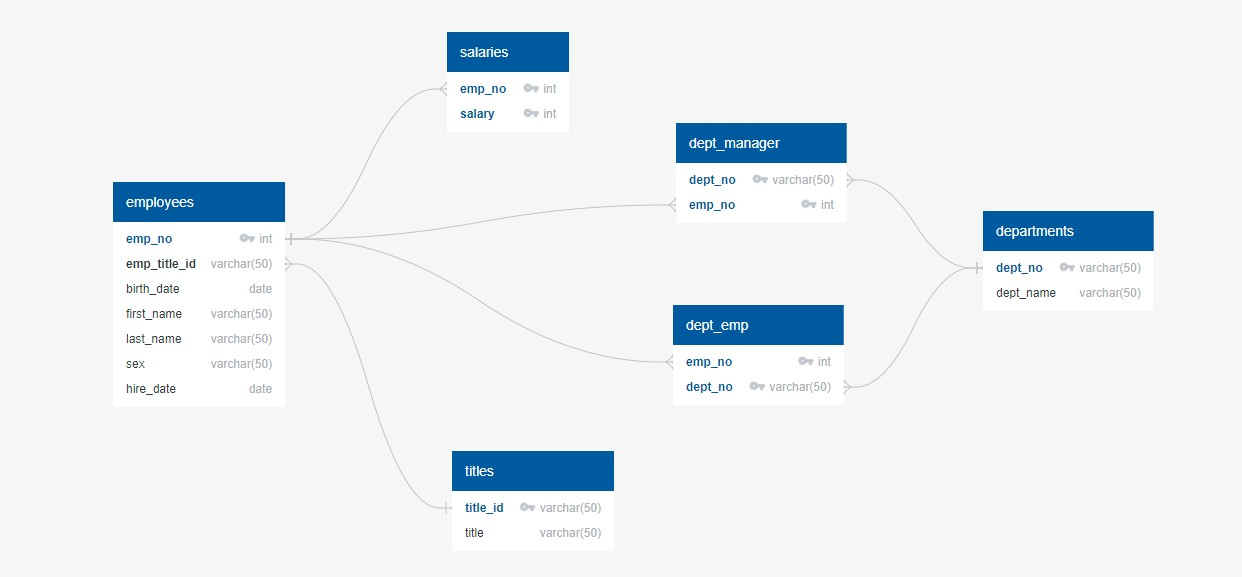

In [1]:
# Schema definintion
from IPython.display import Image, display

path = r'C:\Users\grant\Desktop\sql-challenge\sql-challenge\schema.jpg'
display(Image(filename=path))

### Data Engineering

The below script was used to create tables.  The data was imported in the same order as the tables were created using the import wizard in pgAdmin.

### Data Analysis

In [ ]:
--List the employee number, last name, first name, sex, and salary of each employee

SELECT employees.emp_no, employees.last_name, employees.first_name, employees.sex, salaries.salary
FROM employees
INNER JOIN salaries ON salaries.emp_no=employees.emp_no
LIMIT 100;

In [ ]:
--List the first name, last name, and hire date for the employees who were hired in 1986

SELECT first_name, last_name, hire_date
FROM employees
WHERE hire_date > '1986-01-01' AND hire_date < '1987-01-01'
ORDER BY hire_date ASC;

In [ ]:
--List the manager of each department along with their 
--department number, department name, employee number, last name, and first name.

SELECT employees.emp_no, employees.first_name, employees.last_name, departments.dept_no, departments.dept_name
FROM employees
INNER JOIN dept_manager ON employees.emp_no = dept_manager.emp_no
INNER JOIN departments ON departments.dept_no = dept_manager.dept_no;

In [ ]:
--List the department number for each employee along with that employee’s employee number, 
--last name, first name, and department name

SELECT dept_emp.dept_no, dept_emp.emp_no,employees.last_name, employees.first_name, departments.dept_name  
FROM dept_emp
INNER JOIN departments ON departments.dept_no=dept_emp.dept_no
INNER JOIN employees ON employees.emp_no=dept_emp.emp_no
LIMIT 100;

In [ ]:
# List first name, last name, and sex of each employee whose 
# first name is Hercules and whose last name begins with the letter B

SELECT first_name, last_name, sex
FROM employees
WHERE first_name = 'Hercules' AND last_name LIKE 'B%';

In [ ]:
--List each employee in the Sales department, including their employee number, last name, and first name

SELECT emp_no, last_name, first_name
FROM employees
WHERE employees.emp_no IN

(
    SELECT dept_emp.emp_no
    FROM dept_emp
    INNER JOIN departments ON departments.dept_no=dept_emp.dept_no
    WHERE departments.dept_name = 'Sales'
);

In [ ]:
--List each employee in the Sales and Development departments, including their 
--employee number, last name, first name, and department name

SELECT employees.emp_no, employees.last_name, employees.first_name, departments.dept_name
FROM employees
INNER JOIN dept_emp ON dept_emp.emp_no=employees.emp_no
INNER JOIN departments ON dept_emp.dept_no=departments.dept_no
WHERE employees.emp_no IN

(
    SELECT dept_emp.emp_no
    FROM dept_emp
    INNER JOIN departments ON departments.dept_no=dept_emp.dept_no
    WHERE departments.dept_name IN ('Sales', 'Development')
)

LIMIT 100;

In [ ]:
--List the frequency counts, in descending order, of all the employee last names 
SELECT last_name, COUNT(last_name) as Frequency
FROM employees
GROUP BY last_name
ORDER BY Frequency DESC;